## Death and the Environment

We will try to explore some links between toxins released in each state to the mortality of various US states.

#### Getting mortality data from the CDC

The Center for Disease Control (CDC) publishes [the weekly death counts for different jurisdictions for different age groups](https://data.cdc.gov/NCHS/Weekly-Counts-of-Deaths-by-Jurisdiction-and-Age/y5bj-9g5w).

  - Create a variable called `cdc_df` that is a `pandas.DataFrame` with the following properties:
    - Has all the data from year 2020 and 2021
    - The records should be filtered to those such that the `type` variable is `"Unweighted"`.
    - The necessary columns are `jurisdiction`, `year`, `number_of_deaths`, `week_ending_date`, and `age_group`.
  - Report the total number of deaths in New York over 2020 and 2021 in a human-readable message.

  - To find the spelling of the column names:[here](https://dev.socrata.com/foundry/data.cdc.gov/y5bj-9g5w)


In [ ]:
#read data
import requests
BASE_URL = "https://data.cdc.gov/resource/y5bj-9g5w.json"
#https://data.cdc.gov/resource/y5bj-9g5w.json?$query=SELECT%20jurisdiction%2C%20week_ending_date%2C%20state_abbreviation%2C%20year%2C%20week%2C%20age_group%2C%20number_of_deaths%2C%20time_period%2C%20type%2C%20suppress%2C%20note%20ORDER%20BY%20%3Aid%20ASC
payload={'$limit': 300000, '$offset': 0,
         '$select': 'jurisdiction,year,age_group,number_of_deaths,type'}
resp = requests.get(url = BASE_URL, params=payload)

In [ ]:
resp.status_code

200

In [ ]:
assert resp.status_code == 200

In [ ]:
resp.text[:1000]

'[{"jurisdiction":"Alabama","year":"2015","age_group":"25-44 years","number_of_deaths":"67","type":"Predicted (weighted)"}\n,{"jurisdiction":"Alabama","year":"2015","age_group":"25-44 years","number_of_deaths":"49","type":"Predicted (weighted)"}\n,{"jurisdiction":"Alabama","year":"2015","age_group":"25-44 years","number_of_deaths":"55","type":"Predicted (weighted)"}\n,{"jurisdiction":"Alabama","year":"2015","age_group":"25-44 years","number_of_deaths":"59","type":"Predicted (weighted)"}\n,{"jurisdiction":"Alabama","year":"2015","age_group":"25-44 years","number_of_deaths":"47","type":"Predicted (weighted)"}\n,{"jurisdiction":"Alabama","year":"2015","age_group":"25-44 years","number_of_deaths":"59","type":"Predicted (weighted)"}\n,{"jurisdiction":"Alabama","year":"2015","age_group":"25-44 years","number_of_deaths":"41","type":"Predicted (weighted)"}\n,{"jurisdiction":"Alabama","year":"2015","age_group":"25-44 years","number_of_deaths":"47","type":"Predicted (weighted)"}\n,{"jurisdiction

In [ ]:
data = resp.json()

In [ ]:
type(data)

list

In [ ]:
len(data)

269016

In [ ]:
data[1]

{'jurisdiction': 'Alabama',
 'year': '2015',
 'age_group': '25-44 years',
 'number_of_deaths': '49',
 'type': 'Predicted (weighted)'}

In [ ]:
type(data)

list

In [ ]:
#number of keys
len(data[0])

5

In [ ]:
#check some samples of the data
import pandas as pd
df = pd.DataFrame(data)
df.sample(5)

,jurisdiction,year,age_group,number_of_deaths,type
240834,South Carolina,2015,75-84 years,201,Unweighted
266462,Wisconsin,2017,85 years and older,376,Unweighted
188775,Massachusetts,2020,85 years and older,338,Unweighted
181009,Louisiana,2016,85 years and older,222,Unweighted
224276,Ohio,2015,25-44 years,97,Unweighted


In [ ]:
df.dtypes

jurisdiction        object
year                object
age_group           object
number_of_deaths    object
type                object
dtype: object

In [ ]:
df.jurisdiction.unique().shape

(54,)

In [ ]:
df.type.value_counts()

Predicted (weighted)    134525
Unweighted              134491
Name: type, dtype: int64

In [ ]:
#check type for year
year_type = df.iloc[:4].dtypes
year_type

jurisdiction        object
year                object
age_group           object
number_of_deaths    object
type                object
dtype: object

In [ ]:
filtered_years_data = df[df["year"].isin(['2020', '2021'])]

In [ ]:
filtered_years_data.head(5)

,jurisdiction,year,age_group,number_of_deaths,type
260,Alabama,2020,25-44 years,52,Predicted (weighted)
261,Alabama,2020,25-44 years,49,Predicted (weighted)
262,Alabama,2020,25-44 years,51,Predicted (weighted)
263,Alabama,2020,25-44 years,43,Predicted (weighted)
264,Alabama,2020,25-44 years,46,Predicted (weighted)


In [ ]:
df.head()

,jurisdiction,year,age_group,number_of_deaths,type
0,Alabama,2015,25-44 years,67,Predicted (weighted)
1,Alabama,2015,25-44 years,49,Predicted (weighted)
2,Alabama,2015,25-44 years,55,Predicted (weighted)
3,Alabama,2015,25-44 years,59,Predicted (weighted)
4,Alabama,2015,25-44 years,47,Predicted (weighted)


In [ ]:
filtered_weighted_data = df[df['type'] == 'Predicted (weighted)']

In [ ]:
df.shape

(269016, 5)

In [ ]:
is_type = df['type'] == 'Predicted (weighted)'
is_type.sum()

134525

In [ ]:
cdc_df = df[df["year"].isin(['2020', '2021']) & is_type]

In [ ]:
cdc_df.shape

(31364, 5)

In [ ]:
pd.to_numeric(df['number_of_deaths'], errors='coerce').sum()

105499214.0

#### Wrangle the CDC data (10 pts)

- Wrangle the data such that each row corresponds to a unique jurisdiction and year but aggregated over the weeks and age groups.

- Check whether there are duplicate records for a given `jurisdiction` and `year` combination.



In [ ]:
clean_column = cdc_df.drop(columns = ['age_group', 'type'])

In [ ]:
clean_column.head(10)

,jurisdiction,year,number_of_deaths
260,Alabama,2020,52
261,Alabama,2020,49
262,Alabama,2020,51
263,Alabama,2020,43
264,Alabama,2020,46
265,Alabama,2020,46
266,Alabama,2020,62
267,Alabama,2020,67
268,Alabama,2020,63
269,Alabama,2020,82


In [ ]:
#how many jourisdictions in our data set
clean_column.jurisdiction.unique().shape

(54,)

In [ ]:
#how many unique years in our data set
clean_column.year.unique().shape

(2,)

In [ ]:
clean_column.jurisdiction.shape

(31364,)

In [ ]:
clean_column.year.shape

(31364,)

In [ ]:
#check type for numberofdeaths
clean_column.dtypes

jurisdiction        object
year                object
number_of_deaths    object
dtype: object

By comparing the data we can see that there are duplicates

In [ ]:
#combine rows with same jurisdiction and year
clean_column['number_of_deaths'] = pd.to_numeric(clean_column['number_of_deaths'], errors='coerce')
func = {'number_of_deaths': 'sum'}
cdc = clean_column.groupby(['jurisdiction', 'year']).agg(func).reset_index()

In [ ]:
cdc.head(5)

,jurisdiction,year,number_of_deaths
0,Alabama,2020,64354
1,Alabama,2021,66961
2,Alaska,2020,4581
3,Alaska,2021,5671
4,Arizona,2020,78247


In [ ]:
cdc.shape

(108, 3)

#### Environment Protection Agency (EPA) data

The scraped EPA data is stored in the file `tri_reports2020_2021.json`, containing the annual released toxins report. The general structure of the dataset looks like:
- Years
  - States (state ids)
    - report_title (contains state names)
    - report_data (contains released toxins information)
    
Different states track different toxins so it is reasonable to ask questions like: "Which toxins are tracked by the most states?" and "Which state tracks the fewest number of toxins?". To answer these:

- Write a function that will extract the state name from the `report_title` using regular expression.
- Wrangle the JSON data into a `pandas.DataFrame` where each row corresponds to a year/state combination and the columns (except for year/state) correspond to different toxins. The values should be the total released toxins for that year that state. Store this into a variable called `epa`.
  - One column should correspond to `year` and another should correspond to `state`
  - State ids with no data should not be included in your final data frame.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read the file
file_path = ("/content/drive/MyDrive/tri_reports2020_2021.json")
import json
with open(file_path, 'r') as f:
  dat = json.load(f)

In [ ]:
type(dat)

dict

In [ ]:
len(dat)

2

In [ ]:
dat.keys()

dict_keys(['2020', '2021'])

In [ ]:
dat['2020'].keys()

dict_keys(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56'])

In [ ]:
dat['2020']['01'].keys()

dict_keys(['report_data', 'report_title'])

In [ ]:
dat['2020']['01']['report_title']

'TRI On-site and Off-site Reported Disposed of or Otherwise Released (in pounds), for  All industries, for  All chemicals, Alabama, 2020'

In [ ]:
dat['2020']['02']['report_title']

'TRI On-site and Off-site Reported Disposed of or Otherwise Released (in pounds), for  All industries, for  All chemicals, Alaska, 2020'

In [ ]:
import re
def find_state_name(report_title):
  pattern = r',\s([A-Za-z ]+),\s\d+$'
  match = re.search(pattern, report_title)
  if match:
    state_info = match.group(1)
    return state_info
  else:
    print("doesn't find")



In [ ]:
find_state_name(dat['2020']['01']['report_title'])

'Alabama'

In [ ]:
data_list = []
for year, states in dat.items():
    for state_id, report in states.items():
        state_name = find_state_name(report['report_title'])
        data_list.append({"year": year, "state": state_name, **report['report_data']})
        #**unpacked the dictionary, like a copy

doesn't find
doesn't find
doesn't find
doesn't find
doesn't find
doesn't find
doesn't find
doesn't find
doesn't find
doesn't find


In [ ]:
epa = pd.DataFrame(data_list)
#epa.set_index(['year', 'state'], inplace=True)

In [ ]:
epa

,year,state,"1,2,4-Trichlorobenzene","1,2,4-Trimethylbenzene","1,3-Butadiene","1,4-Dioxane",1-Bromopropane,"1-Chloro-1,1,2,2-tetrafluoroethane (HCFC-124a)","1-Chloro-1,1-difluoroethane (HCFC-142b)","2,4-Dichlorophenol",...,"1-Octanesulfonamide, 1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,8-heptadecafluoro-N-(2-hydroxyethyl)-N-methyl-","1-Octanesulfonamide, 1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,8-heptadecafluoro-N-methyl-","Poly(oxy-1,2-ethanediyl), α-[2-[ethyl[(pentadecafluoroheptyl)sulfonyl]amino]ethyl]-ω-methoxy-","Poly[oxy(methyl-1,2-ethanediyl)], α-[2-[ethyl[(heptadecafluorooctyl)sulfonyl]amino]ethyl]-ω-hydroxy-","Ethanaminium, N,N,N-triethyl-, salt with 1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,8-heptadecafluoro-1-octanesulfonic acid (1:1)","Fatty acids, linseed-oil, γ-ω-perfluoro-C8-14-alkyl esters",4-Dimethylaminoazobenzene,"Alcohols, C8-14, γ-ω-perfluoro",Diepoxybutane,beta-Naphthylamine
0,2020,Alabama,12.0,120542.0,3181.0,26389.0,14394.0,50.0,4611.0,8010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,Alaska,NaN,4850.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,Arizona,NaN,2590.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,Arkansas,NaN,4941.0,0.0,28.0,113148.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2021,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,2021,Washington,NaN,14939.0,1315.0,NaN,68640.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,2021,West Virginia,NaN,14433.0,2.0,37383.0,NaN,69.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,2021,Wisconsin,NaN,85281.0,NaN,84.0,30205.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#shape of epa
epa.shape

(112, 536)

In [ ]:
#since we have make the json data into a data frame with all the toxins based on the year and state, if one toxin
#is not in one state and the other one is in the state, we can see from the table above that it will return a NaN


In [ ]:
#first we need to find the data that only contains 2020
#epa_2020 = epa.loc['2020']
is_2020 = epa.year == '2020'
epa_2020 = epa.loc[is_2020, :]

In [ ]:
epa_2020.shape

(56, 536)

In [ ]:
epa_2020.head(3)

,year,state,"1,2,4-Trichlorobenzene","1,2,4-Trimethylbenzene","1,3-Butadiene","1,4-Dioxane",1-Bromopropane,"1-Chloro-1,1,2,2-tetrafluoroethane (HCFC-124a)","1-Chloro-1,1-difluoroethane (HCFC-142b)","2,4-Dichlorophenol",...,"1-Octanesulfonamide, 1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,8-heptadecafluoro-N-(2-hydroxyethyl)-N-methyl-","1-Octanesulfonamide, 1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,8-heptadecafluoro-N-methyl-","Poly(oxy-1,2-ethanediyl), α-[2-[ethyl[(pentadecafluoroheptyl)sulfonyl]amino]ethyl]-ω-methoxy-","Poly[oxy(methyl-1,2-ethanediyl)], α-[2-[ethyl[(heptadecafluorooctyl)sulfonyl]amino]ethyl]-ω-hydroxy-","Ethanaminium, N,N,N-triethyl-, salt with 1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,8-heptadecafluoro-1-octanesulfonic acid (1:1)","Fatty acids, linseed-oil, γ-ω-perfluoro-C8-14-alkyl esters",4-Dimethylaminoazobenzene,"Alcohols, C8-14, γ-ω-perfluoro",Diepoxybutane,beta-Naphthylamine
0,2020,Alabama,12.0,120542.0,3181.0,26389.0,14394.0,50.0,4611.0,8010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,Alaska,NaN,4850.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
type(epa_2020['1,2,4-Trichlorobenzene'][1])

numpy.float64

In [ ]:
#then we need to find the  toxin(s) being tracked by the most states.
toxin_counts = epa_2020.sum(numeric_only=True)
toxin_counts.sort_values(ascending=False)

Zinc compounds                                                                                                                                                                                                                                                                                                                     539512961.0
Lead compounds                                                                                                                                                                                                                                                                                                                     443601764.0
Arsenic compounds                                                                                                                                                                                                                                                                                                                  3122478

In [ ]:
most_toxins = toxin_counts.sort_values(ascending=False).head()

In [ ]:
most_toxins

Zinc compounds                                                                     539512961.0
Lead compounds                                                                     443601764.0
Arsenic compounds                                                                  312247805.0
Nitrate compounds (water dissociable; reportable only when in aqueous solution)    283171658.0
Manganese compounds                                                                179708190.0
dtype: float64

In [ ]:
epa.dtypes
#epa['year'].dtype

year                                                           object
state                                                          object
1,2,4-Trichlorobenzene                                        float64
1,2,4-Trimethylbenzene                                        float64
1,3-Butadiene                                                 float64
                                                               ...   
Fatty acids, linseed-oil, γ-ω-perfluoro-C8-14-alkyl esters    float64
4-Dimethylaminoazobenzene                                     float64
Alcohols, C8-14, γ-ω-perfluoro                                float64
Diepoxybutane                                                 float64
beta-Naphthylamine                                            float64
Length: 536, dtype: object

In [ ]:
type(epa)

pandas.core.frame.DataFrame

In [ ]:
type(cdc)

pandas.core.frame.DataFrame

In [ ]:
cdc.dtypes

jurisdiction        object
year                object
number_of_deaths     int64
dtype: object

#### Joining the datasets

- Join the `epa` dataset to `cdc` by state and year and assign the outcome to a variable named `jdf`.

- Check using `assert` that no duplicate records were created from the join.

- If there are records that exist in one source but not the other, identify these.

In [ ]:
epa.head(3)

,year,state,"1,2,4-Trichlorobenzene","1,2,4-Trimethylbenzene","1,3-Butadiene","1,4-Dioxane",1-Bromopropane,"1-Chloro-1,1,2,2-tetrafluoroethane (HCFC-124a)","1-Chloro-1,1-difluoroethane (HCFC-142b)","2,4-Dichlorophenol",...,"1-Octanesulfonamide, 1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,8-heptadecafluoro-N-(2-hydroxyethyl)-N-methyl-","1-Octanesulfonamide, 1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,8-heptadecafluoro-N-methyl-","Poly(oxy-1,2-ethanediyl), α-[2-[ethyl[(pentadecafluoroheptyl)sulfonyl]amino]ethyl]-ω-methoxy-","Poly[oxy(methyl-1,2-ethanediyl)], α-[2-[ethyl[(heptadecafluorooctyl)sulfonyl]amino]ethyl]-ω-hydroxy-","Ethanaminium, N,N,N-triethyl-, salt with 1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,8-heptadecafluoro-1-octanesulfonic acid (1:1)","Fatty acids, linseed-oil, γ-ω-perfluoro-C8-14-alkyl esters",4-Dimethylaminoazobenzene,"Alcohols, C8-14, γ-ω-perfluoro",Diepoxybutane,beta-Naphthylamine
0,2020,Alabama,12.0,120542.0,3181.0,26389.0,14394.0,50.0,4611.0,8010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,Alaska,NaN,4850.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cdc.head(3)

,jurisdiction,year,number_of_deaths
0,Alabama,2020,64354
1,Alabama,2021,66961
2,Alaska,2020,4581


In [ ]:
epa.reset_index()

,index,year,state,"1,2,4-Trichlorobenzene","1,2,4-Trimethylbenzene","1,3-Butadiene","1,4-Dioxane",1-Bromopropane,"1-Chloro-1,1,2,2-tetrafluoroethane (HCFC-124a)","1-Chloro-1,1-difluoroethane (HCFC-142b)",...,"1-Octanesulfonamide, 1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,8-heptadecafluoro-N-(2-hydroxyethyl)-N-methyl-","1-Octanesulfonamide, 1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,8-heptadecafluoro-N-methyl-","Poly(oxy-1,2-ethanediyl), α-[2-[ethyl[(pentadecafluoroheptyl)sulfonyl]amino]ethyl]-ω-methoxy-","Poly[oxy(methyl-1,2-ethanediyl)], α-[2-[ethyl[(heptadecafluorooctyl)sulfonyl]amino]ethyl]-ω-hydroxy-","Ethanaminium, N,N,N-triethyl-, salt with 1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,8-heptadecafluoro-1-octanesulfonic acid (1:1)","Fatty acids, linseed-oil, γ-ω-perfluoro-C8-14-alkyl esters",4-Dimethylaminoazobenzene,"Alcohols, C8-14, γ-ω-perfluoro",Diepoxybutane,beta-Naphthylamine
0,0,2020,Alabama,12.0,120542.0,3181.0,26389.0,14394.0,50.0,4611.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020,Alaska,NaN,4850.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020,Arizona,NaN,2590.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020,Arkansas,NaN,4941.0,0.0,28.0,113148.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,107,2021,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,108,2021,Washington,NaN,14939.0,1315.0,NaN,68640.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,109,2021,West Virginia,NaN,14433.0,2.0,37383.0,NaN,69.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,110,2021,Wisconsin,NaN,85281.0,NaN,84.0,30205.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
epa.shape

(112, 536)

In [ ]:
epa.columns

Index(['year', 'state', '1,2,4-Trichlorobenzene', '1,2,4-Trimethylbenzene',
       '1,3-Butadiene', '1,4-Dioxane', '1-Bromopropane',
       '1-Chloro-1,1,2,2-tetrafluoroethane (HCFC-124a)',
       '1-Chloro-1,1-difluoroethane (HCFC-142b)', '2,4-Dichlorophenol',
       ...
       '1-Octanesulfonamide, 1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,8-heptadecafluoro-N-(2-hydroxyethyl)-N-methyl-',
       '1-Octanesulfonamide, 1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,8-heptadecafluoro-N-methyl-',
       'Poly(oxy-1,2-ethanediyl), α-[2-[ethyl[(pentadecafluoroheptyl)sulfonyl]amino]ethyl]-ω-methoxy-',
       'Poly[oxy(methyl-1,2-ethanediyl)], α-[2-[ethyl[(heptadecafluorooctyl)sulfonyl]amino]ethyl]-ω-hydroxy-',
       'Ethanaminium, N,N,N-triethyl-, salt with 1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,8-heptadecafluoro-1-octanesulfonic acid (1:1)',
       'Fatty acids, linseed-oil, γ-ω-perfluoro-C8-14-alkyl esters',
       '4-Dimethylaminoazobenzene', 'Alcohols, C8-14, γ-ω-perfluoro',
       'Diepoxybutane', 'beta-Naphthylamine

In [ ]:
epa.index

RangeIndex(start=0, stop=112, step=1)

In [ ]:
cdc.shape

(108, 3)

In [ ]:
jdf = epa.merge(cdc, left_on=['state', 'year'], right_on=['jurisdiction', 'year'], how='inner')

In [ ]:
jdf.shape

(102, 538)

In [ ]:
#jdf.loc[jdf.number_of_deaths.isna(),:]

In [ ]:
jdf.sort_values(['state', 'year']).head()

,year,state,"1,2,4-Trichlorobenzene","1,2,4-Trimethylbenzene","1,3-Butadiene","1,4-Dioxane",1-Bromopropane,"1-Chloro-1,1,2,2-tetrafluoroethane (HCFC-124a)","1-Chloro-1,1-difluoroethane (HCFC-142b)","2,4-Dichlorophenol",...,"Poly(oxy-1,2-ethanediyl), α-[2-[ethyl[(pentadecafluoroheptyl)sulfonyl]amino]ethyl]-ω-methoxy-","Poly[oxy(methyl-1,2-ethanediyl)], α-[2-[ethyl[(heptadecafluorooctyl)sulfonyl]amino]ethyl]-ω-hydroxy-","Ethanaminium, N,N,N-triethyl-, salt with 1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,8-heptadecafluoro-1-octanesulfonic acid (1:1)","Fatty acids, linseed-oil, γ-ω-perfluoro-C8-14-alkyl esters",4-Dimethylaminoazobenzene,"Alcohols, C8-14, γ-ω-perfluoro",Diepoxybutane,beta-Naphthylamine,jurisdiction,number_of_deaths
0,2020,Alabama,12.0,120542.0,3181.0,26389.0,14394.0,50.0,4611.0,8010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alabama,64354
51,2021,Alabama,11.0,155248.0,4461.0,24139.0,15072.0,50.0,2645.0,7175.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alabama,66961
1,2020,Alaska,NaN,4850.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alaska,4581
52,2021,Alaska,NaN,6041.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alaska,5671
2,2020,Arizona,NaN,2590.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arizona,78247


In [ ]:
jdf.shape

(102, 538)

In [ ]:
row1 = jdf.iloc[0, 0]
row2 = jdf.iloc[2, 0]
row1

'2020'

In [ ]:
demo = pd.DataFrame({"a": [2, 2], "b": [1, 1], "c": [3, 3.1]})
print(demo)
demo.duplicated()

   a  b    c
0  2  1  3.0
1  2  1  3.1


0    False
1    False
dtype: bool

In [ ]:
#Please check using assert that no duplicate records were created from the join.
duplicates = jdf.duplicated()
assert not any(duplicates), 'There are duplicates'
#from this we can see that there is no duplicates

In [ ]:
#If there are records that exist in one source but not the other, please identify these cases and describe them
jdf.shape

(118, 538)

In [ ]:
missing_values = jdf.isna()
missing_values

,year,state,"1,2,4-Trichlorobenzene","1,2,4-Trimethylbenzene","1,3-Butadiene","1,4-Dioxane",1-Bromopropane,"1-Chloro-1,1,2,2-tetrafluoroethane (HCFC-124a)","1-Chloro-1,1-difluoroethane (HCFC-142b)","2,4-Dichlorophenol",...,"Poly(oxy-1,2-ethanediyl), α-[2-[ethyl[(pentadecafluoroheptyl)sulfonyl]amino]ethyl]-ω-methoxy-","Poly[oxy(methyl-1,2-ethanediyl)], α-[2-[ethyl[(heptadecafluorooctyl)sulfonyl]amino]ethyl]-ω-hydroxy-","Ethanaminium, N,N,N-triethyl-, salt with 1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,8-heptadecafluoro-1-octanesulfonic acid (1:1)","Fatty acids, linseed-oil, γ-ω-perfluoro-C8-14-alkyl esters",4-Dimethylaminoazobenzene,"Alcohols, C8-14, γ-ω-perfluoro",Diepoxybutane,beta-Naphthylamine,jurisdiction,number_of_deaths
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
1,False,False,True,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
2,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
114,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
115,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
116,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False


In [ ]:
missing_counts = missing_values.sum()
missing_counts

year                                0
state                              16
1,2,4-Trichlorobenzene            106
1,2,4-Trimethylbenzene             18
1,3-Butadiene                      56
                                 ... 
Alcohols, C8-14, γ-ω-perfluoro    117
Diepoxybutane                     117
beta-Naphthylamine                117
jurisdiction                       10
number_of_deaths                   10
Length: 538, dtype: int64

#### Plotting

Visualize the relationship between `Ammonia` and `number_of_deaths` in 2021.

- Calculate the Pearson correlation coefficient between the variables.


<Axes: xlabel='Ammonia'>

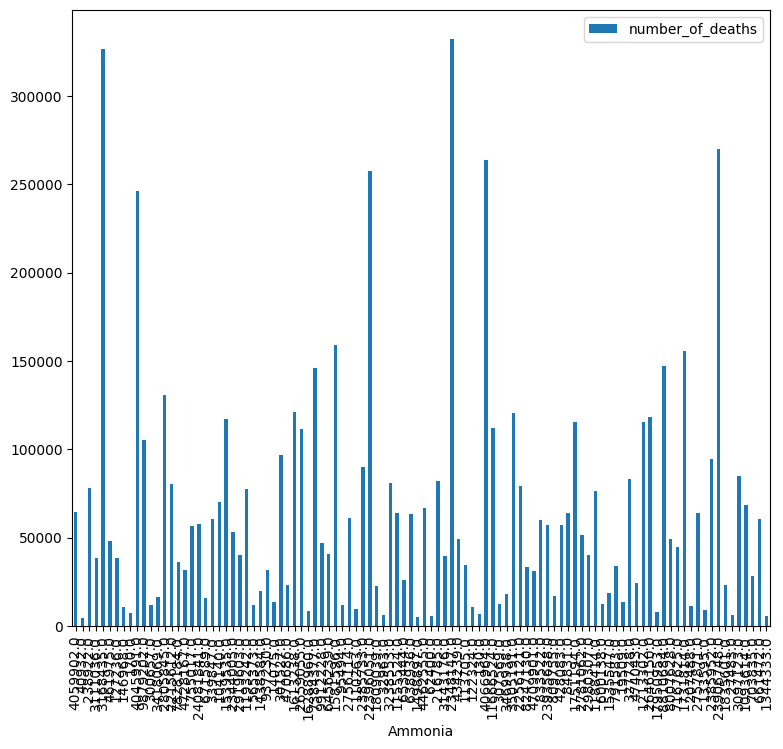

In [ ]:
jdf.plot(x="Ammonia", y= 'number_of_deaths', kind="bar", figsize=(9, 8))

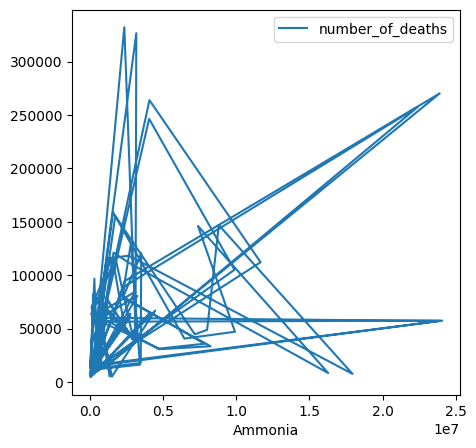

In [ ]:
import matplotlib.pyplot as mp
jdf.plot(x="Ammonia", y='number_of_deaths',
        kind="line", figsize=(5, 5))
mp.show()

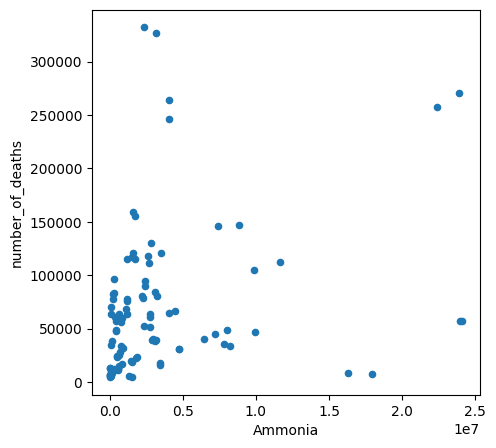

In [ ]:
jdf.plot(x="Ammonia", y='number_of_deaths',
        kind="scatter", figsize=(5, 5))

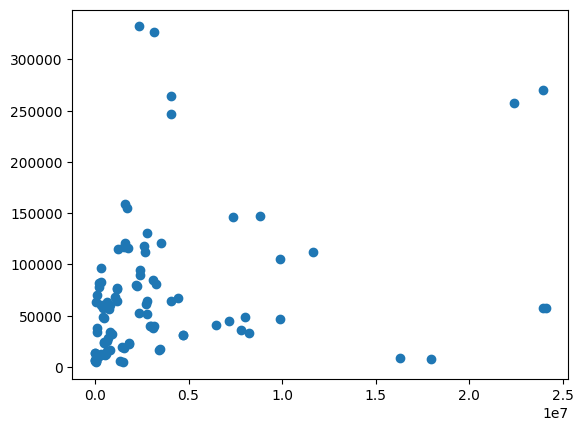

In [ ]:

mp.scatter(jdf.Ammonia, jdf.number_of_deaths, s=None, c=None, marker=None, cmap=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors=None)

In [ ]:
#Please calculate the Pearson correlation coefficient between the variables you selected
from scipy.stats import pearsonr
Ammonia = jdf['Ammonia']
number_of_deaths = jdf['number_of_deaths']
result = pearsonr(Ammonia, number_of_deaths)
result

PearsonRResult(statistic=0.293283587899787, pvalue=0.0027752731615120173)

In [ ]:
print('Based on the graph and calculation, I think there is no relationship between Ammonia and number of deaths')

Based on the graph and calculation, I think there is no relationship between Ammonia and number of deaths


#### Data science

Before studying the relationship between the total toxins released and the number of deaths, the population of each state could be a confounder, i.e. larger states have more deaths and larger states may pollute more. How should we process the data to address this issue?


In [ ]:
jdf.head(10)

,year,state,"1,2,4-Trichlorobenzene","1,2,4-Trimethylbenzene","1,3-Butadiene","1,4-Dioxane",1-Bromopropane,"1-Chloro-1,1,2,2-tetrafluoroethane (HCFC-124a)","1-Chloro-1,1-difluoroethane (HCFC-142b)","2,4-Dichlorophenol",...,"Poly(oxy-1,2-ethanediyl), α-[2-[ethyl[(pentadecafluoroheptyl)sulfonyl]amino]ethyl]-ω-methoxy-","Poly[oxy(methyl-1,2-ethanediyl)], α-[2-[ethyl[(heptadecafluorooctyl)sulfonyl]amino]ethyl]-ω-hydroxy-","Ethanaminium, N,N,N-triethyl-, salt with 1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,8-heptadecafluoro-1-octanesulfonic acid (1:1)","Fatty acids, linseed-oil, γ-ω-perfluoro-C8-14-alkyl esters",4-Dimethylaminoazobenzene,"Alcohols, C8-14, γ-ω-perfluoro",Diepoxybutane,beta-Naphthylamine,jurisdiction,number_of_deaths
0,2020,Alabama,12.0,120542.0,3181.0,26389.0,14394.0,50.0,4611.0,8010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alabama,64354
1,2020,Alaska,NaN,4850.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alaska,4581
2,2020,Arizona,NaN,2590.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arizona,78247
3,2020,Arkansas,NaN,4941.0,0.0,28.0,113148.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arkansas,38372
4,2020,California,NaN,105568.0,1809.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,California,326645
5,2020,Colorado,NaN,31645.0,6955.0,255.0,178.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colorado,48256
6,2020,Connecticut,NaN,3781.0,NaN,NaN,8764.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Connecticut,38346
7,2020,Delaware,NaN,681.0,222.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delaware,10719
8,2020,District of Columbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,District of Columbia,7088
9,2020,Florida,NaN,44134.0,NaN,164.0,161.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Florida,246434


In [ ]:
#we should calculate the correlation between the amount of toxins been released and number of deaths to see if they are correlated.
jdf['Total Toxins Released'] = jdf.drop(['jurisdiction', 'year', 'number_of_deaths'], axis=1).sum(axis=1)

<ipython-input-222-eeb8156e1f24>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  jdf['Total Toxins Released'] = jdf.drop(['jurisdiction', 'year', 'number_of_deaths'], axis=1).sum(axis=1)


In [ ]:
correlation = jdf['Total Toxins Released'].corr(jdf['number_of_deaths'])

In [ ]:
correlation

0.013276517068677716

In [ ]:
#we need to find the percentage difference
jdf2020 = jdf.loc[jdf.year == "2020", ["Ammonia", "state"]]
jdf2021 = jdf.loc[jdf.year == "2021", ["Ammonia", "state"]]

In [ ]:
mdf = jdf2020.merge(jdf2021, on="state", suffixes=["_2020", "_2021"])

In [ ]:
mdf.head(3)

,Ammonia_2020,state,Ammonia_2021
0,4059902.0,Alabama,4462555.0
1,40932.0,Alaska,62400.0
2,238922.0,Arizona,216785.0


In [ ]:
mdf.head(3)

,Ammonia_2020,state,Ammonia_2021
0,4059902.0,Alabama,4462555.0
1,40932.0,Alaska,62400.0
2,238922.0,Arizona,216785.0
